In [11]:
import tifffile
import numpy as np
from scipy.ndimage import gaussian_laplace
#import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
from collections import deque

a = tifffile.memmap( 'D:\merge_gephyrin_bassoon_r1gfp_r2mche_r2mk2_histmatched.tif' )
b = a[:,1,:512,:512].astype(float)
del a
k = gaussian_laplace(b, sigma=2) #3.5
del b

otsu_val = filters.threshold_otsu(k.ravel())
c = -1 * (k < otsu_val).astype(int)
del k
b = c

color = 0
q = deque()
for z in range( b.shape[0]-1 ):
    for x in range( b.shape[1]-1 ):
        for y in range( b.shape[2]-1 ):
            if b[z,x,y] == -1:
                color += 1
                q.append( (z,x,y) )

                while q:
                    pt = q.pop()
                    if b[pt] != -1:
                        continue

                    b[pt] = color

                    if pt[0]-1 >= 0:
                        q.append( (pt[0]-1, pt[1], pt[2]) )
                    if pt[0]+1 != b.shape[0]:
                        q.append( (pt[0]+1, pt[1], pt[2]) )
                    if pt[1]-1 >= 0:
                        q.append( (pt[0], pt[1]-1, pt[2]) )
                    if pt[1]+1 != b.shape[1]:
                        q.append( (pt[0], pt[1]+1, pt[2]) )
                    if pt[2]-1 >= 0:
                        q.append( (pt[0], pt[1], pt[2]-1) )
                    if pt[2]+1 != b.shape[2]:
                        q.append( (pt[0], pt[1], pt[2]+1) )

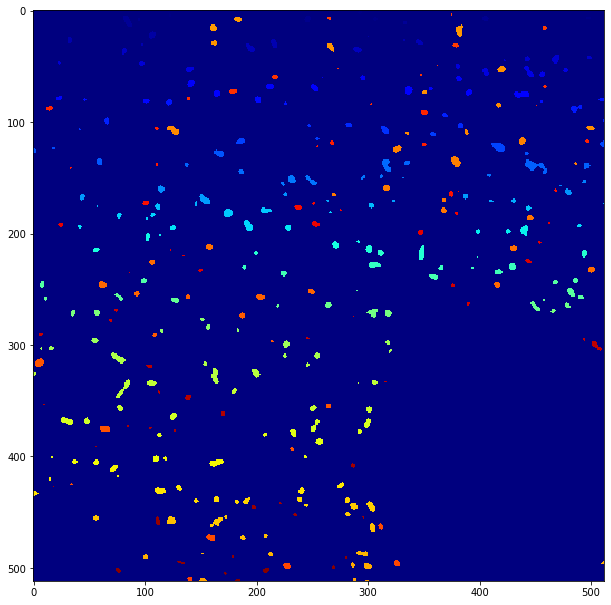

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

imgplot = plt.imshow(b[2], cmap="jet")
plt.show()